# Rice Leaf Disease Prediction using Convolutional Neural Network

# **Introduction to the RiceLeaf Disease Prediction Project**

Rice, a staple food for a significant portion of the global population, is primarily cultivated and consumed in Asian regions. The health of rice plants, particularly their leaves, is crucial for ensuring optimal crop yields. Rice leaves vary in size, shape, and characteristics depending on the variety, environmental conditions, and growth stage. As the plants mature, these leaves may exhibit changes due to diseases, pest infestations, or environmental stress.

Regular monitoring of rice leaves is essential for early detection and prevention of potential threats to crop health. Among the most common and impactful rice leaf diseases are:  
1. **Leaf Smut**  
2. **Brown Spot**  
3. **Bacterial Leaf Blight**  

In this project, we aim to leverage Convolutional Neural Networks (CNNs) to develop a model capable of identifying these three diseases from rice leaf images. The dataset consists of 119 images, evenly distributed across the three categories.

The implementation involves a structured approach:  
1. Importing necessary libraries and the dataset.  
2. Visualizing images to understand their characteristics.  
3. Normalizing image pixel values for consistent processing.  
4. Splitting the dataset into training and testing subsets.  
5. Designing a CNN model architecture.  
6. Compiling the model with appropriate parameters.  
7. Training the model and monitoring validation accuracy.  
8. Selecting the best-performing model for predictions.  
9. Visualizing predictions to evaluate the model's performance.  

This project aims to provide an efficient and reliable solution for early detection of rice leaf diseases, supporting agricultural stakeholders in maintaining healthy crops and maximizing yield potential.


## Importing necessary libraries.

In [4]:

# Importing necessary libraries for image processing and machine learning
import os  # Provides a way of using operating system dependent functionality
from os import listdir  # Allows listing the files in a directory
from PIL import Image  # Python Imaging Library for opening, manipulating, and saving images
import cv2  # OpenCV library for computer vision tasks
import numpy as np  # Library for numerical operations on arrays
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels into numerical format
from sklearn.model_selection import train_test_split  # For splitting datasets into training and testing sets
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For evaluating model performance
import tensorflow as tf  # TensorFlow library for building and training machine learning models
import keras_tuner as kt  # Keras Tuner for hyperparameter tuning of Keras models
from tensorflow.keras.preprocessing.image import img_to_array  # For converting images to numpy arrays
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For augmenting image data
from tensorflow.keras.applications import ResNet50  # Pre-trained ResNet50 model for transfer learning
from tensorflow.keras.models import Sequential  # For creating a linear stack of layers in a model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D  # Various layers for building CNNs
import warnings  # Library for issuing warning messages
warnings.filterwarnings('ignore')  # Ignore warnings to keep the output clean
from tensorflow.keras.preprocessing.image import img_to_array  # Importing again for image conversion (redundant)

## Importing the Dataset

In [159]:

def load_images_from_folder(folder_path, target_size=(256,256)):
    # Initialize an empty list to store the images and their corresponding class labels
    images = []
    
    # Iterate through each class folder in the specified folder path
    for class_folder in os.listdir(folder_path):
        # Create the full path for the current class folder
        class_path = os.path.join(folder_path, class_folder)
        
        # Iterate through each image file in the current class folder
        for image_file in os.listdir(class_path):
            # Create the full path for the current image file
            image_path = os.path.join(class_path, image_file)
            
            # Open the image, resize it to the target size, and convert it to a numpy array
            img = Image.open(image_path).resize(target_size)
            
            # Append the image array and its corresponding class label to the images list
            images.append((np.array(img), class_folder))
    
    # Return the list of images and their class labels
    return images

bact = load_images_from_folder('Bacterial leaf blight')
brown = load_images_from_folder('Brown spot')
smut = load_images_from_folder('Leaf smut')

In [7]:
bact

[(array([[[229, 215, 210],
          [228, 214, 209],
          [228, 213, 209],
          ...,
          [230, 214, 209],
          [229, 215, 209],
          [228, 215, 210]],
  
         [[227, 214, 208],
          [227, 215, 209],
          [229, 214, 209],
          ...,
          [230, 215, 210],
          [230, 216, 210],
          [229, 215, 210]],
  
         [[227, 214, 208],
          [228, 215, 209],
          [230, 214, 209],
          ...,
          [229, 215, 209],
          [230, 216, 210],
          [232, 216, 210]],
  
         ...,
  
         [[229, 215, 210],
          [229, 215, 208],
          [228, 215, 209],
          ...,
          [227, 216, 211],
          [228, 215, 209],
          [227, 213, 209]],
  
         [[229, 214, 210],
          [228, 213, 208],
          [227, 215, 209],
          ...,
          [228, 216, 211],
          [229, 215, 209],
          [228, 214, 209]],
  
         [[229, 214, 209],
          [229, 213, 210],
          [227, 215, 209

In [8]:
brown

[(array([[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         ...,
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [167, 186,  70],
          [161, 184,  70],
          [162, 184,  74]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [162, 183,  65],
          [162, 187,  73],
          [162, 187,  79]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255

In [9]:
smut

[(array([[[239, 230, 224],
          [240, 229, 223],
          [240, 229, 223],
          ...,
          [241, 225, 213],
          [241, 233, 225],
          [241, 232, 227]],
  
         [[239, 230, 225],
          [240, 229, 224],
          [239, 228, 223],
          ...,
          [242, 230, 220],
          [241, 233, 225],
          [240, 232, 225]],
  
         [[240, 231, 226],
          [240, 230, 224],
          [239, 228, 223],
          ...,
          [242, 232, 225],
          [242, 233, 227],
          [241, 232, 225]],
  
         ...,
  
         [[239, 232, 226],
          [240, 231, 226],
          [241, 231, 227],
          ...,
          [239, 228, 222],
          [240, 230, 222],
          [240, 231, 223]],
  
         [[239, 230, 225],
          [240, 231, 226],
          [240, 231, 226],
          ...,
          [239, 229, 223],
          [239, 229, 223],
          [240, 230, 223]],
  
         [[239, 229, 224],
          [240, 231, 226],
          [240, 231, 225

## Visualizing the Images

In [11]:
# Define the number of samples to be selected from each dataset
no_of_samples = 15

# Select the first 'no_of_samples' entries from the 'bact' dataset
bact_set = bact[:no_of_samples]

# Select the first 'no_of_samples' entries from the 'brown' dataset
brown_set = brown[:no_of_samples]

# Select the first 'no_of_samples' entries from the 'smut' dataset
smut_set = smut[:no_of_samples]

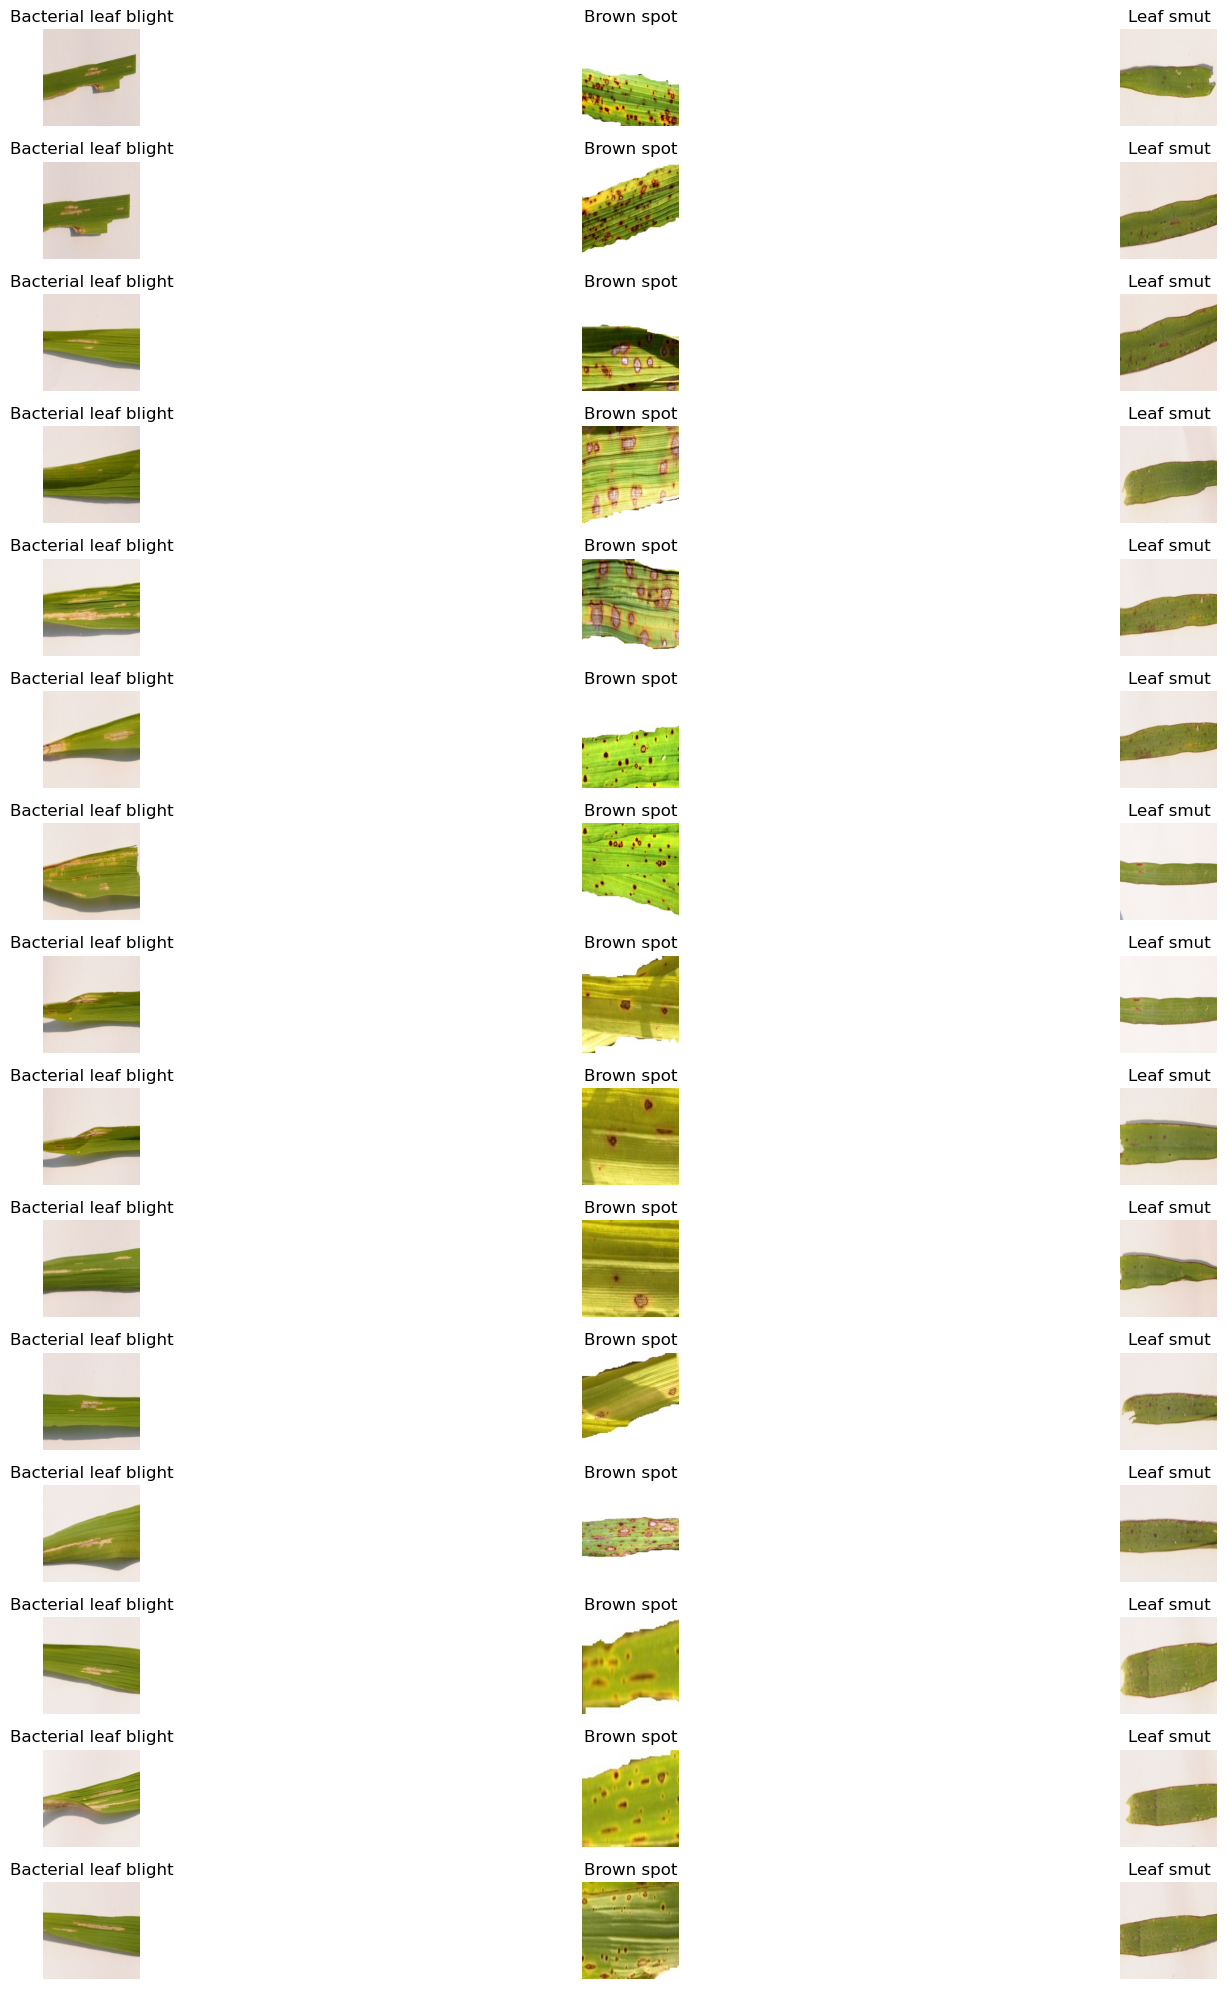

In [12]:
# Create a figure with subplots arranged in a grid with 'no_of_samples' rows and 3 columns
fig, axes = plt.subplots(nrows = no_of_samples, ncols = 3, figsize=(20,20))

# Loop through each sample to display images
for i in range(no_of_samples):
    # Display the first image (Bacterial leaf blight) in the first column
    axes[i,0].imshow(bact_set[i][0])
    axes[i,0].set_title('Bacterial leaf blight')  # Set the title for the first image
    axes[i,0].axis('off')  # Turn off the axis for a cleaner look
    
    # Display the second image (Brown spot) in the second column
    axes[i,1].imshow(brown_set[i][0])
    axes[i,1].set_title('Brown spot')  # Set the title for the second image
    axes[i,1].axis('off')  # Turn off the axis for a cleaner look
    
    # Display the third image (Leaf smut) in the third column
    axes[i,2].imshow(smut_set[i][0])
    axes[i,2].set_title('Leaf smut')  # Set the title for the third image
    axes[i,2].axis('off')  # Turn off the axis for a cleaner look
    
# Adjust the layout to prevent overlap of subplots
plt.tight_layout()
# Display the figure with all the subplots
plt.show()

## Data Preprocessing

In [14]:
# Splitting the image arrays and labels into two different lists

# Initialize empty lists to hold images and their corresponding labels
img_array = []
img_label = []

# Iterate over the 'bact' dataset to append images and labels to the respective lists
for img, label in bact: 
    img_array.append(img)  # Append the image to the img_array list
    img_label.append(label)  # Append the label to the img_label list
    
# Iterate over the 'brown' dataset to append images and labels to the respective lists
for img, label in brown:  
    img_array.append(img)  # Append the image to the img_array list
    img_label.append(label)  # Append the label to the img_label list
    
# Iterate over the 'smut' dataset to append images and labels to the respective lists
for img, label in smut:
    img_array.append(img)  # Append the image to the img_array list
    img_label.append(label)  # Append the label to the img_label list

In [15]:
img_array

[array([[[229, 215, 210],
         [228, 214, 209],
         [228, 213, 209],
         ...,
         [230, 214, 209],
         [229, 215, 209],
         [228, 215, 210]],
 
        [[227, 214, 208],
         [227, 215, 209],
         [229, 214, 209],
         ...,
         [230, 215, 210],
         [230, 216, 210],
         [229, 215, 210]],
 
        [[227, 214, 208],
         [228, 215, 209],
         [230, 214, 209],
         ...,
         [229, 215, 209],
         [230, 216, 210],
         [232, 216, 210]],
 
        ...,
 
        [[229, 215, 210],
         [229, 215, 208],
         [228, 215, 209],
         ...,
         [227, 216, 211],
         [228, 215, 209],
         [227, 213, 209]],
 
        [[229, 214, 210],
         [228, 213, 208],
         [227, 215, 209],
         ...,
         [228, 216, 211],
         [229, 215, 209],
         [228, 214, 209]],
 
        [[229, 214, 209],
         [229, 213, 210],
         [227, 215, 209],
         ...,
         [228, 214, 210],
  

In [16]:
img_label

['Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial 

In [17]:
# converting the lists into array

img_array =np.array(img_array)
img_label = np.array(img_label)

### Normalizing image pixel values for consistent processing.

In [19]:
# Normalize the image array by scaling pixel values to the range [0, 1]
X = img_array / 255

# Assign the image labels to the variable y
y = img_label

In [20]:
titles = ["Bacterial Leaf Blight","Brown Spot","Leaf Smut"]
titles

['Bacterial Leaf Blight', 'Brown Spot', 'Leaf Smut']

In [21]:
y

array(['Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight', 'Bacterial leaf blight',
       'Bacterial leaf blight',

## Encoding the label values with LabelEncoder 
Converting the string values to numerical values (0,1,2)

In [23]:
# Create an instance of the LabelEncoder class
label_encoder = LabelEncoder()

In [24]:
# Use the label encoder to transform the target variable 'y' into a numerical format
# This is necessary for machine learning algorithms that require numerical input
y_encoded = label_encoder.fit_transform(y)

In [25]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

# Splitting the dataset into training and testing subsets. 

In [27]:
# Split the dataset into training and testing sets
# x_train: features for the training set
# x_test: features for the testing set
# y_train: labels for the training set
# y_test: labels for the testing set
# test_size=0.2 indicates that 20% of the data will be used for testing
# random_state=42 ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [28]:
print(x_train.shape)
print(y_train.shape)

(95, 256, 256, 3)
(95,)


# Designing a CNN model architecture.

In [30]:
# Define the number of output classes for the model
num_classes = 3

# Initialize a Sequential model
model_cnn = Sequential()

# Add a convolutional layer with 16 filters, a kernel size of 3, and ReLU activation
# Input shape is set to (256, 256, 3) for RGB images
model_cnn.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(256, 256, 3)))

# Add a max pooling layer to reduce the spatial dimensions of the output
model_cnn.add(MaxPooling2D(pool_size=2))

# Add another convolutional layer with 32 filters and ReLU activation
model_cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

# Add another max pooling layer
model_cnn.add(MaxPooling2D(pool_size=2))

# Add a convolutional layer with 64 filters and ReLU activation
model_cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

# Add another max pooling layer
model_cnn.add(MaxPooling2D(pool_size=2))

# Add a dropout layer to prevent overfitting, with a dropout rate of 0.3
model_cnn.add(Dropout(0.3))

# Flatten the output from the convolutional layers to feed into the dense layers
model_cnn.add(Flatten())  # Add a Flatten layer here

# Add a dense layer with 500 units and ReLU activation
model_cnn.add(Dense(500, activation='relu'))

# Add another dropout layer to further prevent overfitting
model_cnn.add(Dropout(0.3))

# Add the output layer with 'num_classes' units and softmax activation for multi-class classification
model_cnn.add(Dense(num_classes, activation='softmax'))

# Display the model's architecture summary
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │      32,768,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,503 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,793,587 (125.10 MB)

 Trainable params: 32,793,587 (125.10 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling the model with appropriate parameters. 

In [32]:
# Compile the CNN model with the specified optimizer, loss function, and evaluation metrics
model_cnn.compile(
    optimizer='adam',  # Use the Adam optimizer for training
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy as the loss function for multi-class classification
    metrics=['accuracy']  # Track accuracy as a performance metric during training and evaluation
)

# Training the model and monitoring validation accuracy.

In [34]:
#updating the model's parameters in each iteration.
history_cnn = model_cnn.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.2305 - loss: 3.5818 - val_accuracy: 0.4211 - val_loss: 2.6340
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2919 - loss: 3.0290 - val_accuracy: 0.2105 - val_loss: 1.1221
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 909ms/step - accuracy: 0.4361 - loss: 1.0641 - val_accuracy: 0.2632 - val_loss: 1.1581
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 896ms/step - accuracy: 0.4227 - loss: 1.0301 - val_accuracy: 0.2632 - val_loss: 1.2061
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 908ms/step - accuracy: 0.5432 - loss: 0.9832 - val_accuracy: 0.2632 - val_loss: 1.0721
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5837 - loss: 0.8728 - val_accuracy: 0.4211 - val_loss: 1.2304
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 939ms/step - accuracy: 0.5590 - loss: 0.7969 - val_accuracy: 0.7368 - val_loss: 0.8999
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 939ms/step - accuracy: 0.7066 - loss: 0.7479 - val_accuracy: 0.5263 - val_loss: 0.9964
E

In [35]:
# testing the model
test_loss_, test_accuracy = model_cnn.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.7500 - loss: 1.2162
Test accuracy: 0.7500


# Prediction using the trained model

In [37]:
# Use the trained CNN model to make predictions on the test dataset
predictions = model_cnn.predict(x_test)

# Print the raw prediction probabilities
print("Prediction probabilities:")
print(predictions)

# Convert prediction probabilities to class labels
predicted_classes = predictions.argmax(axis=1)  # Get the index of the highest probability for each sample
print("Predicted class labels:")
print(predicted_classes)

# Compare predictions with true labels (optional)
print("True labels:")
print(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Prediction probabilities:
[[2.1444335e-12 9.9999928e-01 7.4819303e-07]
 [5.9931763e-03 1.7534354e-01 8.1866330e-01]
 [9.0588820e-01 9.3978405e-02 1.3341139e-04]
 [1.4249956e-02 9.8565567e-01 9.4310592e-05]
 [9.9987066e-01 1.2644516e-04 2.8300326e-06]
 [9.2586205e-09 1.5527382e-01 8.4472615e-01]
 [2.5174993e-01 7.1049041e-01 3.7759684e-02]
 [9.9999940e-01 6.1757532e-07 3.2249179e-11]
 [3.4089808e-04 2.2175074e-01 7.7790838e-01]
 [1.1273643e-05 9.7737771e-01 2.2611074e-02]
 [9.9489152e-01 5.0706887e-03 3.7877740e-05]
 [4.1143109e-13 9.9999964e-01 3.5834401e-07]
 [2.2159331e-01 7.7642351e-01 1.9831681e-03]
 [8.7000541e-03 9.8452353e-01 6.7764367e-03]
 [9.1415830e-04 9.9638188e-01 2.7039677e-03]
 [3.2473421e-01 5.7154030e-01 1.0372549e-01]
 [4.6199926e-07 9.7905582e-01 2.0943685e-02]
 [9.7874945e-01 2.0304783e-03 1.9220078e-02]
 [1.6383260e-01 4.0002409e-01 4.3614334e-01]
 [4.5809815e-05 7.6121859e-07 9.9995351e-01]
 [9.2020794e-04 9.2717332e-01 7.190

# Model Evaluation and Visualizing the Training and Testing

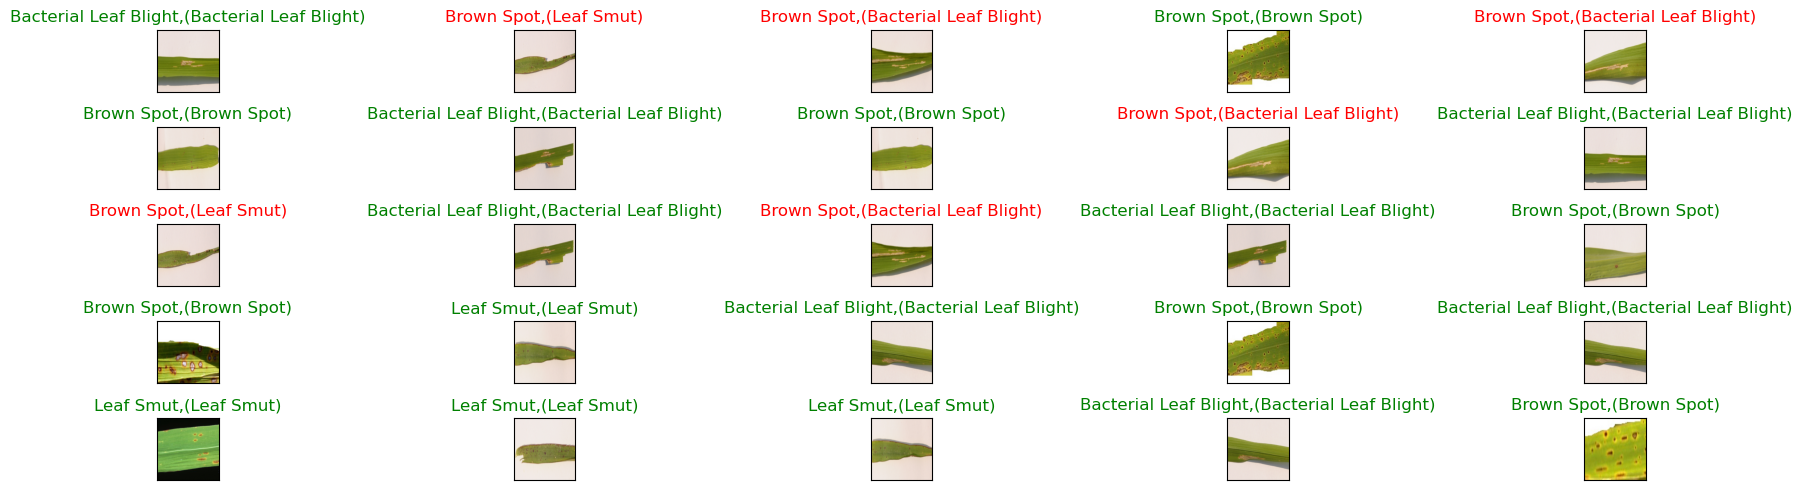

In [39]:
# Set the figure size for the plot
plt.figure(figsize=(20, 5))

# Loop through a random selection of 25 images from the test set
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=25)):
    # Create a subplot for each image
    plt.subplot(5, 5, i + 1)
    
    # Display the image
    plt.imshow(np.squeeze(x_test[idx]))
    
    # Get the predicted and true labels
    pred_idx = predicted_classes[idx]  # Use predicted_classes from the previous code
    true_idx = y_test[idx]
    
    # Remove x and y ticks
    plt.xticks([])
    plt.yticks([])
    
    # Set the title with the predicted and true labels
    # Title color is green if prediction is correct, red otherwise
    plt.title("{},({})".format(titles[pred_idx], titles[true_idx]),
              color=("green" if pred_idx == true_idx else "red"))

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


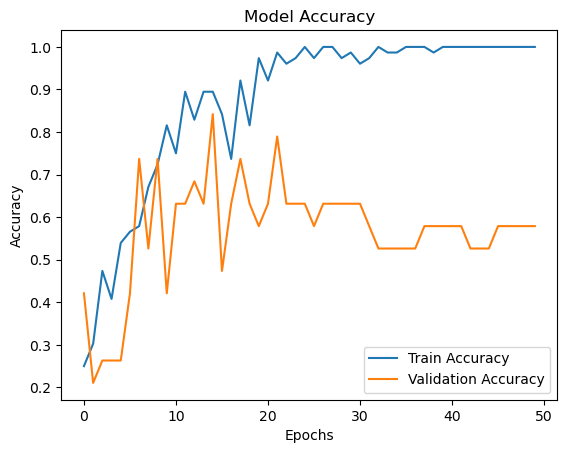

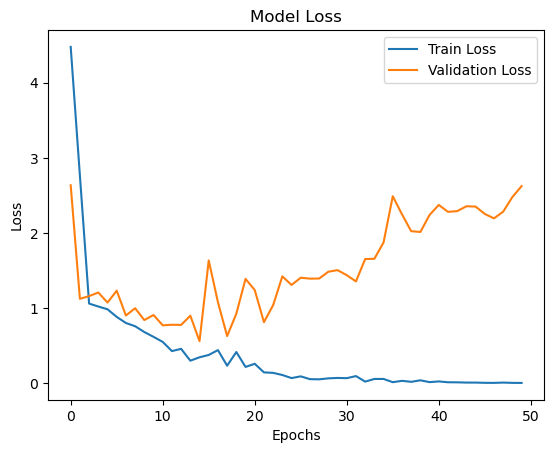

In [40]:
# Visualize training history

# Plot accuracy
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.legend()  # Add legend to the plot
plt.title('Model Accuracy')  # Set the title of the plot
plt.xlabel('Epochs')  # Set the label for the x-axis
plt.ylabel('Accuracy')  # Set the label for the y-axis
plt.show()  # Display the plot

# Plot loss
plt.plot(history_cnn.history['loss'], label='Train Loss')  # Plot training loss
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.legend()  # Add legend to the plot
plt.title('Model Loss')  # Set the title of the plot
plt.xlabel('Epochs')  # Set the label for the x-axis
plt.ylabel('Loss')  # Set the label for the y-axis
plt.show()  # Display the plot


# Model Evaluation Report for CNN Model

In [42]:
# Print the classification report
print("Classification Report:")  # Print the header for the classification report
print(classification_report(y_test, predicted_classes, target_names=titles))  # Print the classification report with target names

# Compute and print the confusion matrix
print("Confusion Matrix:")  # Print the header for the confusion matrix
print(confusion_matrix(y_test, predicted_classes))  # Print the confusion matrix

# Compute and print accuracy
accuracy_cnn = accuracy_score(y_test, predicted_classes)  # Compute the accuracy score
print(f"Accuracy: {accuracy_cnn:.4f}")  # Print the accuracy score with 4 decimal places


Classification Report:
                       precision    recall  f1-score   support

Bacterial Leaf Blight       1.00      0.71      0.83         7
           Brown Spot       0.57      1.00      0.73         8
            Leaf Smut       1.00      0.56      0.71         9

             accuracy                           0.75        24
            macro avg       0.86      0.76      0.76        24
         weighted avg       0.86      0.75      0.75        24

Confusion Matrix:
[[5 2 0]
 [0 8 0]
 [0 4 5]]
Accuracy: 0.7500


## Remark

The CNN model for Rice Leaf Predicton has accuracy of 62%

# Hyper Parameter tuning with keras tuner 

- We use kera tunne tuner to find the optimal paramaters for the CNN Model

In [46]:
# Function to build model with Keras Tuner
def build_model(hp):
    model_kt = Sequential()  # Initialize a Sequential model

    # Add CNN layers (from Code 1)
    model_kt.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))  # Add a Conv2D layer
    model_kt.add(MaxPooling2D(pool_size=2))  # Add a MaxPooling2D layer
    model_kt.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))  # Add another Conv2D layer
    model_kt.add(MaxPooling2D(pool_size=2))  # Add another MaxPooling2D layer
    model_kt.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))  # Add another Conv2D layer
    model_kt.add(MaxPooling2D(pool_size=2))  # Add another MaxPooling2D layer
    model_kt.add(Dropout(0.3))  # Add a Dropout layer

    # Add flatten and dense layers
    model_kt.add(Flatten())  # Add a Flatten layer
    model_kt.add(Dense(hp.Int('units', min_value=128, max_value=512, step=64), activation='relu'))  # Add a Dense layer with hyperparameter tuning
    model_kt.add(Dropout(hp.Float('dropout', 0.3, 0.7, step=0.1)))  # Add a Dropout layer with hyperparameter tuning

    # Output layer for classification (3 classes)
    model_kt.add(Dense(3, activation='softmax'))  # Add a Dense layer for output

    # Compile model_kt
    model_kt.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),  # Compile with Adam optimizer and hyperparameter tuning for learning rate
        loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy loss
        metrics=['accuracy']  # Track accuracy metric
    )

    return model_kt  # Return the built model


In [47]:
# Initialize the Keras Tuner RandomSearch
tuner = kt.RandomSearch(
    build_model,  # Function to build the model
    objective='val_accuracy',  # Objective to optimize (validation accuracy)
    max_trials=5,  # Maximum number of trials
    directory='kt_tuning',  # Directory to save the tuning results
    project_name='cnn_transfer_learning'  # Project name
)

# Perform hyperparameter tuning
tuner.search(x_train, y_train, epochs=50, validation_split = 0.2)  # Search for the best hyperparameters


Reloading Tuner from kt_tuning\cnn_transfer_learning\tuner0.json


# Retreiving the best hyperparameters

In [49]:
# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]  # Retrieve the best hyperparameters from the tuner
print("Best Hyperparameters:")  # Print the header for the best hyperparameters
print(f"Units: {best_hps.get('units')}")  # Print the best value for 'units'
print(f"Dropout: {best_hps.get('dropout')}")  # Print the best value for 'dropout'
print(f"Learning Rate: {best_hps.get('learning_rate')}")  # Print the best value for 'learning_rate'


Best Hyperparameters:
Units: 128
Dropout: 0.4
Learning Rate: 0.001


# Model Building and Training with the best hyperparameters

In [51]:
# Build and train the best model

# Build the model using the best hyperparameters
model_hp = tuner.hypermodel.build(best_hps)  


# Train the model with the training data and validation data for 50 epochs
history_hp = model_hp.fit(x_train, y_train, epochs=50, validation_split = 0.2)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 882ms/step - accuracy: 0.4437 - loss: 2.8195 - val_accuracy: 0.2105 - val_loss: 2.9946
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 613ms/step - accuracy: 0.3285 - loss: 3.4684 - val_accuracy: 0.5263 - val_loss: 1.0313
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 657ms/step - accuracy: 0.2919 - loss: 1.2741 - val_accuracy: 0.2105 - val_loss: 1.5148
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 630ms/step - accuracy: 0.3573 - loss: 1.2398 - val_accuracy: 0.2105 - val_loss: 1.2294
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 720ms/step - accuracy: 0.4463 - loss: 1.0284 - val_accuracy: 0.2632 - val_loss: 1.1525
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 782ms/step - accuracy: 0.5693 - loss: 0.9914 - val_accuracy: 0.2105 - val_loss: 1.3496
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 635ms/step - accuracy: 0.5105 - loss: 0.9918 - val_accuracy: 0.3158 - val_loss: 1.1846
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 655ms/step - accuracy: 0.6190 - loss: 0.9186 - val_accuracy: 0.2632 - val_loss:

In [52]:
# Evaluate the model
loss, accuracy = model_hp.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.6667 - loss: 1.1264
Test Accuracy: 0.6667


# Prediction using the trained model

In [54]:
# Use the trained CNN model to make predictions on the test dataset
prediction = model_hp.predict(x_test)

# Print the raw prediction probabilities
print("Prediction probabilities:")
print(predictions)

# Convert prediction probabilities to class labels
predicted_classes = predictions.argmax(axis=1)  # Get the index of the highest probability for each sample
print("Predicted class labels:")
print(predicted_classes)

# Compare predictions with true labels (optional)
print("True labels:")
print(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
Prediction probabilities:
[[2.1444335e-12 9.9999928e-01 7.4819303e-07]
 [5.9931763e-03 1.7534354e-01 8.1866330e-01]
 [9.0588820e-01 9.3978405e-02 1.3341139e-04]
 [1.4249956e-02 9.8565567e-01 9.4310592e-05]
 [9.9987066e-01 1.2644516e-04 2.8300326e-06]
 [9.2586205e-09 1.5527382e-01 8.4472615e-01]
 [2.5174993e-01 7.1049041e-01 3.7759684e-02]
 [9.9999940e-01 6.1757532e-07 3.2249179e-11]
 [3.4089808e-04 2.2175074e-01 7.7790838e-01]
 [1.1273643e-05 9.7737771e-01 2.2611074e-02]
 [9.9489152e-01 5.0706887e-03 3.7877740e-05]
 [4.1143109e-13 9.9999964e-01 3.5834401e-07]
 [2.2159331e-01 7.7642351e-01 1.9831681e-03]
 [8.7000541e-03 9.8452353e-01 6.7764367e-03]
 [9.1415830e-04 9.9638188e-01 2.7039677e-03]
 [3.2473421e-01 5.7154030e-01 1.0372549e-01]
 [4.6199926e-07 9.7905582e-01 2.0943685e-02]
 [9.7874945e-01 2.0304783e-03 1.9220078e-02]
 [1.6383260e-01 4.0002409e-01 4.3614334e-01]
 [4.5809815e-05 7.6121859e-07 9.9995351e-01]
 [9.2020794e-04 9.2717332e-01 7.190

# Visualizing the training

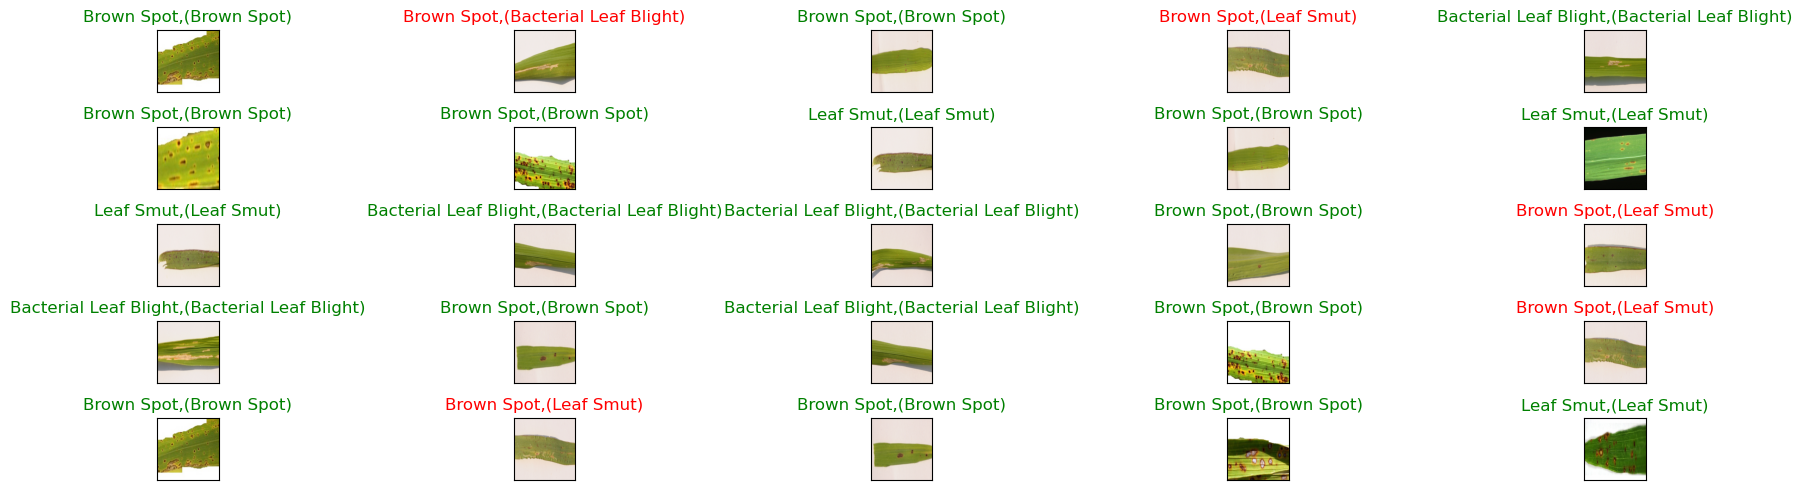

In [56]:
# Set the figure size for the plot
plt.figure(figsize=(20, 5))

# Loop through a random selection of 25 images from the test set
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=25)):
    # Create a subplot for each image
    plt.subplot(5, 5, i + 1)
    
    # Display the image
    plt.imshow(np.squeeze(x_test[idx]))
    
    # Get the predicted and true labels
    pred_idx = predicted_classes[idx]  # Use predicted_classes from the previous code
    true_idx = y_test[idx]
    
    # Remove x and y ticks
    plt.xticks([])
    plt.yticks([])
    
    # Set the title with the predicted and true labels
    # Title color is green if prediction is correct, red otherwise
    plt.title("{},({})".format(titles[pred_idx], titles[true_idx]),
              color=("green" if pred_idx == true_idx else "red"))

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


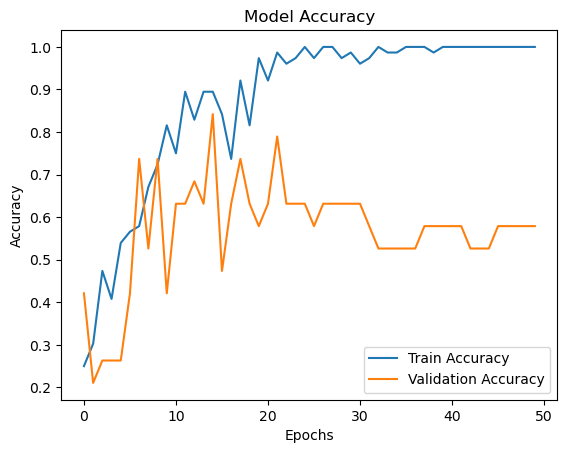

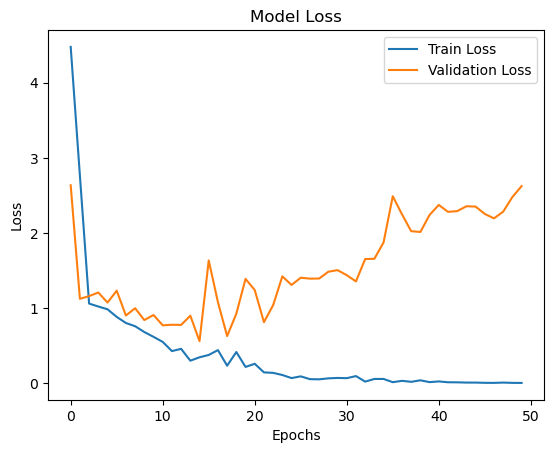

In [57]:
# Visualize training history

# Plot accuracy
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.legend()  # Add legend to the plot
plt.title('Model Accuracy')  # Set the title of the plot
plt.xlabel('Epochs')  # Set the label for the x-axis
plt.ylabel('Accuracy')  # Set the label for the y-axis
plt.show()  # Display the plot

# Plot loss
plt.plot(history_cnn.history['loss'], label='Train Loss')  # Plot training loss
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.legend()  # Add legend to the plot
plt.title('Model Loss')  # Set the title of the plot
plt.xlabel('Epochs')  # Set the label for the x-axis
plt.ylabel('Loss')  # Set the label for the y-axis
plt.show()  # Display the plot


# Model Evaluation Report for CNN Keras Tuner Model 

In [59]:
# Print the classification report
print("Classification Report:")  # Print the header for the classification report
print(classification_report(y_test, predicted_classes, target_names=titles))  # Print the classification report with target names

# Compute and print the confusion matrix
print("Confusion Matrix:")  # Print the header for the confusion matrix
print(confusion_matrix(y_test, predicted_classes))  # Print the confusion matrix

# Compute and print accuracy
accuracy_kt = accuracy_score(y_test, predicted_classes)  # Compute the accuracy score
print(f"Accuracy: {accuracy_kt:.4f}")  # Print the accuracy score with 4 decimal places


Classification Report:
                       precision    recall  f1-score   support

Bacterial Leaf Blight       1.00      0.71      0.83         7
           Brown Spot       0.57      1.00      0.73         8
            Leaf Smut       1.00      0.56      0.71         9

             accuracy                           0.75        24
            macro avg       0.86      0.76      0.76        24
         weighted avg       0.86      0.75      0.75        24

Confusion Matrix:
[[5 2 0]
 [0 8 0]
 [0 4 5]]
Accuracy: 0.7500


## Remarks

- This hyperparameter trained model also gives 62% accuracy.
- Also this  keras tuner is a space consuming method

# **Designing the Model with ResNet50**

In [62]:

# Load ResNet50 as the base model (without the top classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


# Building the Sequential model
model_resnet = Sequential()

# Adding the ResNet model as a layer in Sequential
model_resnet.add(base_model)

model_resnet.add(GlobalAveragePooling2D())  # Use GlobalAveragePooling2D instead of Flatten
model_resnet.add(Dense(256, activation='relu'))
model_resnet.add(Dropout(0.5))
model_resnet.add(Dense(3, activation='softmax'))  # Assuming 3 classes for classification

# Compile the model
model_resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model_resnet.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 8, 8, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,113,027 (91.98 MB)

 Trainable params: 24,059,907 (91.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

# Building and Training the Model

In [64]:
# Train the ResNet model
history_resnet = model_resnet.fit(
    x_train,  # Training data
    y_train,  # Training labels
    validation_split=0.2,  # Use 20% of the training data for validation
    epochs=50,  # Train for 50 epochs
    batch_size=32,  # Use a batch size of 32
)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 140s 18s/step - accuracy: 0.5629 - loss: 1.0408 - val_accuracy: 0.2632 - val_loss: 7.7752
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 49s 15s/step - accuracy: 0.9017 - loss: 0.3985 - val_accuracy: 0.2632 - val_loss: 18.0640
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 15s/step - accuracy: 0.9241 - loss: 0.3103 - val_accuracy: 0.5263 - val_loss: 407.3557
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 49s 15s/step - accuracy: 0.9515 - loss: 0.2474 - val_accuracy: 0.2105 - val_loss: 924.4005
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 49s 15s/step - accuracy: 0.9554 - loss: 0.1739 - val_accuracy: 0.2105 - val_loss: 2528.2866
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 50s 15s/step - accuracy: 0.9278 - loss: 0.5011 - val_accuracy: 0.2105 - val_loss: 12655.1953
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 49s 15s/step - accuracy: 0.9542 - loss: 0.2031 - val_accuracy: 0.2105 - val_loss: 31543.3320
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 48s 14s/step - accuracy: 0.8561 - loss: 0.4912 - val_accuracy: 0.2105 - 

# Predicting the model

In [66]:
# Make predictions on the test set
predictions = model_resnet.predict(x_test)

# Print the raw prediction probabilities
print("Prediction probabilities:")
print(predictions)

# Convert prediction probabilities to class labels
predicted_classes = predictions.argmax(axis=1)  # Get the index of the highest probability for each sample
print("Predicted class labels:")
print(predicted_classes)

# Compare predictions with true labels (optional)
print("True labels:")
print(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Prediction probabilities:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
Predicted class labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
True labels:
[1 2 0 1 0 2 1 0 2 1 0 2 0 2 1 0 2 0 2 2 1 1 2 1]


# Visualizing Predictions

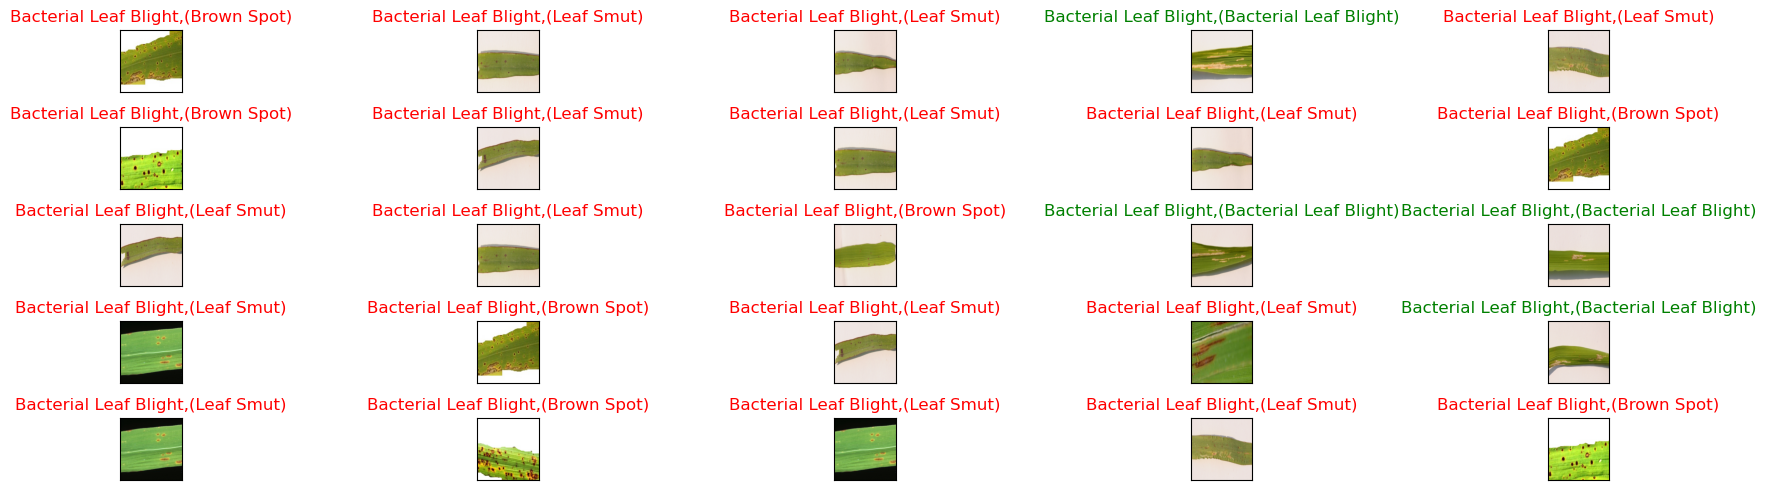

In [68]:
# Set the figure size for the plot
plt.figure(figsize=(20, 5))

# Loop through a random selection of 25 images from the test set
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=25)):
    # Create a subplot for each image
    plt.subplot(5, 5, i + 1)
    
    # Display the image
    plt.imshow(np.squeeze(x_test[idx]))
    
    # Get the predicted and true labels
    pred_idx = predicted_classes[idx]  # Use predicted_classes from the previous code
    true_idx = y_test[idx]
    
    # Remove x and y ticks
    plt.xticks([])
    plt.yticks([])
    
    # Set the title with the predicted and true labels
    # Title color is green if prediction is correct, red otherwise
    plt.title("{},({})".format(titles[pred_idx], titles[true_idx]),
              color=("green" if pred_idx == true_idx else "red"))

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


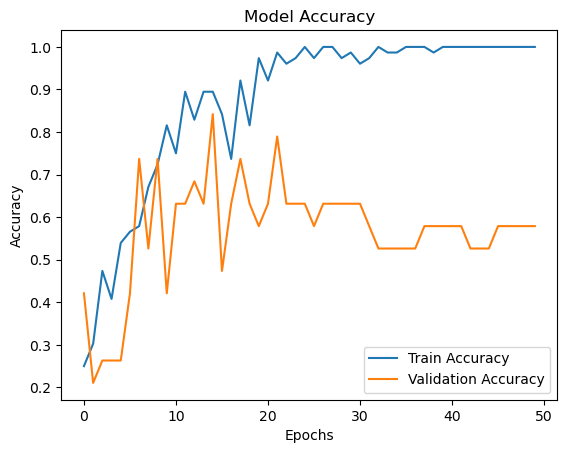

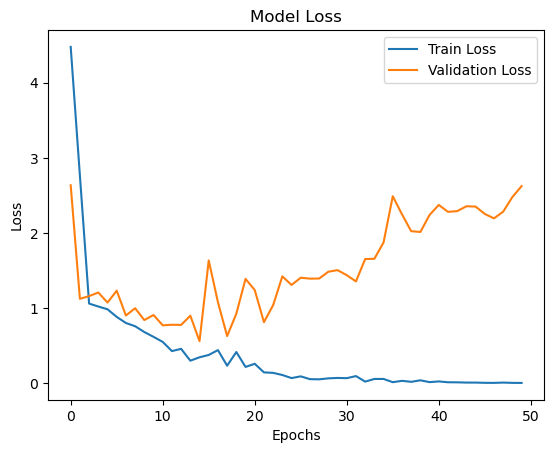

In [69]:
# Visualize training history

# Plot accuracy
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.legend()  # Add legend to the plot
plt.title('Model Accuracy')  # Set the title of the plot
plt.xlabel('Epochs')  # Set the label for the x-axis
plt.ylabel('Accuracy')  # Set the label for the y-axis
plt.show()  # Display the plot

# Plot loss
plt.plot(history_cnn.history['loss'], label='Train Loss')  # Plot training loss
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.legend()  # Add legend to the plot
plt.title('Model Loss')  # Set the title of the plot
plt.xlabel('Epochs')  # Set the label for the x-axis
plt.ylabel('Loss')  # Set the label for the y-axis
plt.show()  # Display the plot


# Model Evaluation Report

In [71]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, predicted_classes, target_names=titles))

# Compute and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted_classes))

# Compute and print accuracy
accuracy_resnet = accuracy_score(y_test, predicted_classes)
print(f"Accuracy: {accuracy_resnet:.4f}")

Classification Report:
                       precision    recall  f1-score   support

Bacterial Leaf Blight       0.29      1.00      0.45         7
           Brown Spot       0.00      0.00      0.00         8
            Leaf Smut       0.00      0.00      0.00         9

             accuracy                           0.29        24
            macro avg       0.10      0.33      0.15        24
         weighted avg       0.09      0.29      0.13        24

Confusion Matrix:
[[7 0 0]
 [8 0 0]
 [9 0 0]]
Accuracy: 0.2917


## Remarks

- The Rice Leaf Disease Prediction Model Using CNN with  ResNet50 as a base model gives only 37.5%.
- Also, It predicts one class only . so we rule out this method for Rice Leaf Disease Prediction problem.

# **Data Augmentation**

## Visualizing and understanding how Data Augmentation and ImageDataGenerator works

In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator with data augmentation parameters
data_generator = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20% of the height
    horizontal_flip=True  # Randomly flip images horizontally
)

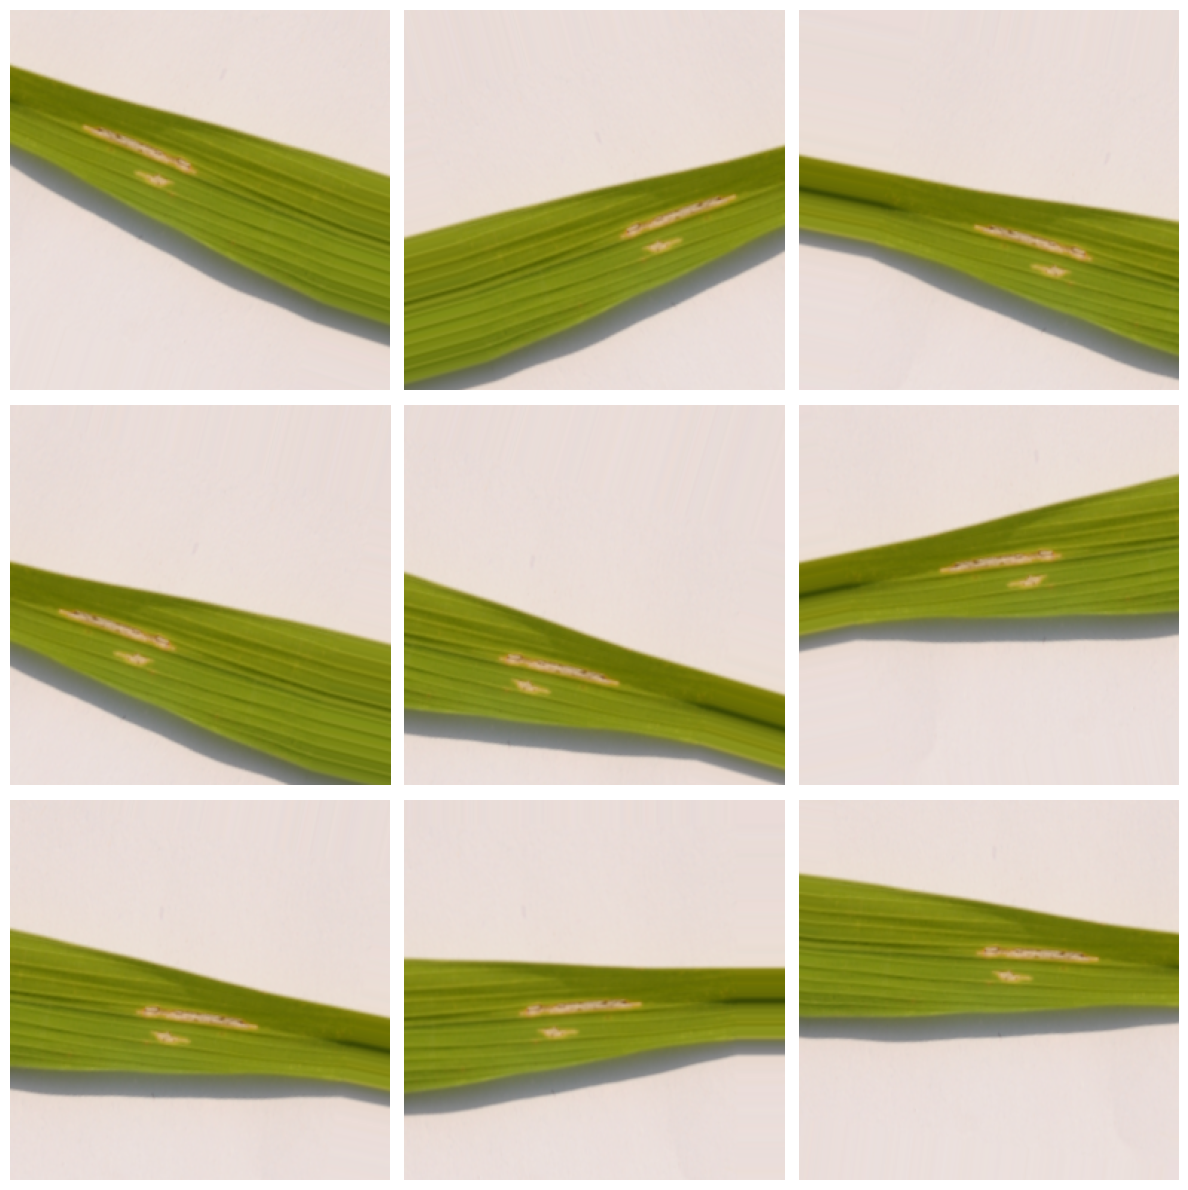

In [76]:
# Select a sample image from the dataset
sample_image = X[2]
sample_image = np.expand_dims(sample_image, axis=0)  # Expand dimensions to match the input shape expected by the model

# Set the figure size for the plot
plt.figure(figsize=(12, 12))

# Generate and plot augmented images
for i, augmented_image in enumerate(data_generator.flow(sample_image, batch_size=1)):
    plt.subplot(3, 3, i + 1)  # Create a subplot for each augmented image
    plt.imshow(augmented_image[0])  # Display the augmented image
    plt.axis('off')  # Remove axis ticks
    if i == 8:  # Stop after generating 9 images
        break

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()  # Display the plot

# Designing a Convultional Neural Network Model

In [78]:
def create_model(input_shape, num_classes):
    model = Sequential([  # Initialize a Sequential model
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),  # Add a Conv2D layer with 32 filters
        MaxPooling2D((2, 2)),  # Add a MaxPooling2D layer
        Conv2D(64, (3, 3), activation='relu'),  # Add another Conv2D layer with 64 filters
        MaxPooling2D((2, 2)),  # Add another MaxPooling2D layer
        Conv2D(128, (3, 3), activation='relu'),  # Add another Conv2D layer with 128 filters
        MaxPooling2D((2, 2)),  # Add another MaxPooling2D layer
        Flatten(),  # Flatten the output
        Dense(128, activation='relu'),  # Add a Dense layer with 128 units
        Dropout(0.5),  # Add a Dropout layer with 50% dropout rate
        Dense(num_classes, activation='softmax')  # Output layer with softmax activation for classification
    ])
    # Compile the model with Adam optimizer and sparse categorical crossentropy loss
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  
    
    return model  # Return the built model


# Defining the ImageDataGenerator Parameters

In [80]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

- roation_angle - an angle where the image is rotated and the algorithm is run. it goes from -45 to +45(exampe)
- width& height_shift_range - randomly shifting the image horizontally and vertically. This helps the model tolerate small translations in the input data.
- shear_range - maximum range of shear on the axis 
- fill_mode - "nearest," "constant," "reflect," and "wrap."

## Building a Model

In [83]:
input_shape = (256, 256, 3) # input shape
num_classes = len(label_encoder.classes_) # prediction classes
model_da = create_model(input_shape, num_classes) # model creation

# Data flow for Image Data Generator

In [85]:
# Generate augmented data
augmented_data = datagen.flow(x_train, y_train, batch_size=32)  
# Create an iterator that generates batches of augmented data

In [86]:
validation_data = datagen.flow(x_test,y_test)

In [87]:
# Train the model with augmented data
history_da = model_da.fit(
    augmented_data,  # Augmented training data
    epochs=50,  # Train for 50 epochs
    steps_per_epoch=len(x_train) // 32,  # Number of steps per epoch
    validation_data = validation_data  # Validation data
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.3438 - loss: 5.7896 - val_accuracy: 0.3750 - val_loss: 1.9950
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2903 - loss: 3.1588 - val_accuracy: 0.3750 - val_loss: 1.4673
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.3581 - loss: 1.6487 - val_accuracy: 0.2917 - val_loss: 1.1905
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4375 - loss: 1.1142 - val_accuracy: 0.2917 - val_loss: 1.1313
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.4062 - loss: 1.1406 - val_accuracy: 0.3333 - val_loss: 1.0979
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3871 - loss: 1.1015 - val_accuracy: 0.3333 - val_loss: 1.0964
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.3229 - loss: 1.0994 - val_accuracy: 0.4583 - val_loss: 1.0874
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4839 - loss: 1.0661 - val_accuracy: 0.3333 - val_loss: 1.0899
Epoch 9/50
2/2 

In [88]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_da.evaluate(x_test,y_test)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step - accuracy: 0.7917 - loss: 1.0184
Test Accuracy: 0.7917, Test Loss: 1.0184


In [89]:
# Make predictions on the test set
predictions = model_da.predict(x_test)

# Print the raw prediction probabilities
print("Prediction probabilities:")
print(predictions)

# Convert prediction probabilities to class labels
predicted_classes = predictions.argmax(axis=1)  # Get the index of the highest probability for each sample
print("Predicted class labels:")
print(predicted_classes)

# Compare predictions with true labels (optional)
print("True labels:")
print(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
Prediction probabilities:
[[2.79316425e-01 5.91737807e-01 1.28945798e-01]
 [2.62709826e-01 1.71180308e-01 5.66109836e-01]
 [6.32446229e-01 2.11663067e-01 1.55890688e-01]
 [2.46559232e-01 3.95567238e-01 3.57873529e-01]
 [5.62784731e-01 2.39514798e-01 1.97700456e-01]
 [1.12948925e-04 1.22452003e-03 9.98662472e-01]
 [5.34262598e-01 2.99009472e-01 1.66727990e-01]
 [5.86977839e-01 2.93485552e-01 1.19536661e-01]
 [2.40590647e-01 1.53438866e-01 6.05970442e-01]
 [2.53039539e-01 2.00475082e-01 5.46485364e-01]
 [3.88067186e-01 2.42747456e-01 3.69185269e-01]
 [7.01814890e-02 2.49621093e-01 6.80197418e-01]
 [4.51490819e-01 3.21683079e-01 2.26826131e-01]
 [2.47302741e-01 1.73060268e-01 5.79637051e-01]
 [5.12747467e-03 2.40790751e-03 9.92464662e-01]
 [6.29578590e-01 1.95588991e-01 1.74832433e-01]
 [2.54525334e-01 1.81792587e-01 5.63682020e-01]
 [4.57423627e-01 1.89776197e-01 3.52800101e-01]
 [2.69504726e-01 1.63185596e-01 5.67309737e-01]
 [3.27228918e-03 1.4570

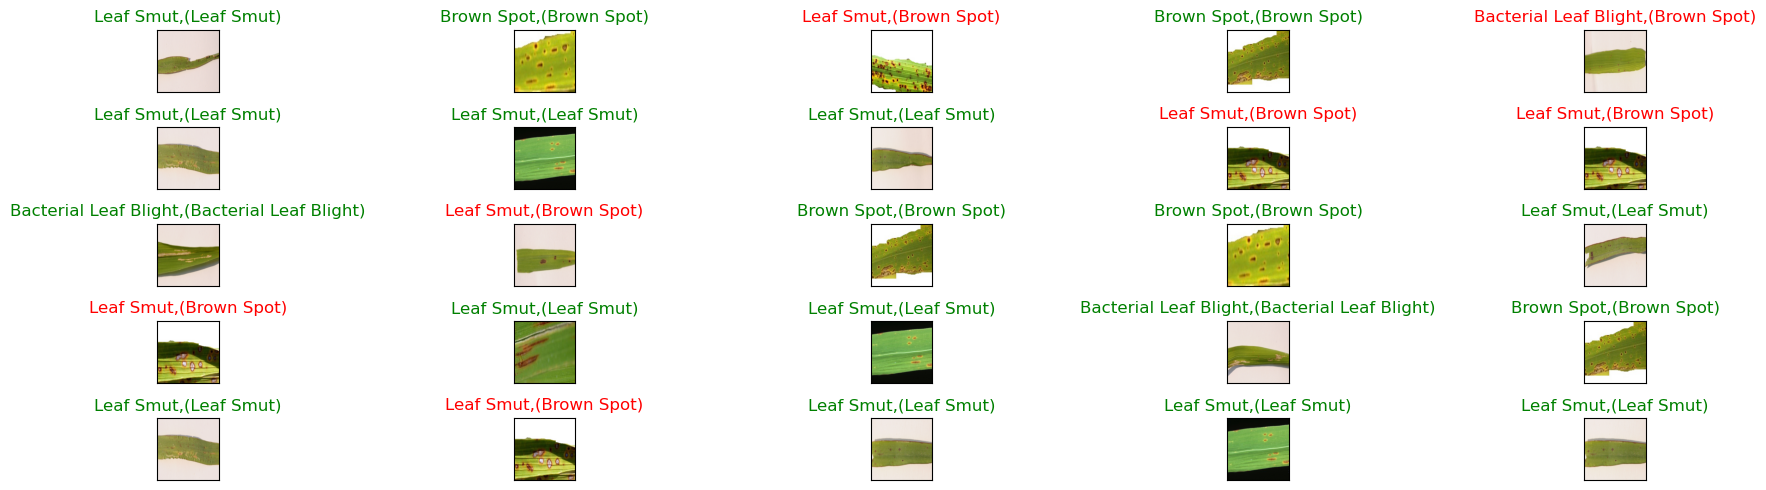

In [90]:
# Set the figure size for the plot
plt.figure(figsize=(20, 5))

# Loop through a random selection of 25 images from the test set
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=25)):
    # Create a subplot for each image
    plt.subplot(5, 5, i + 1)
    
    # Display the image
    plt.imshow(np.squeeze(x_test[idx]))
    
    # Get the predicted and true labels
    pred_idx = predicted_classes[idx]  # Use predicted_classes from the previous code
    true_idx = y_test[idx]
    
    # Remove x and y ticks
    plt.xticks([])
    plt.yticks([])
    
    # Set the title with the predicted and true labels
    # Title color is green if prediction is correct, red otherwise
    plt.title("{},({})".format(titles[pred_idx], titles[true_idx]),
              color=("green" if pred_idx == true_idx else "red"))

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


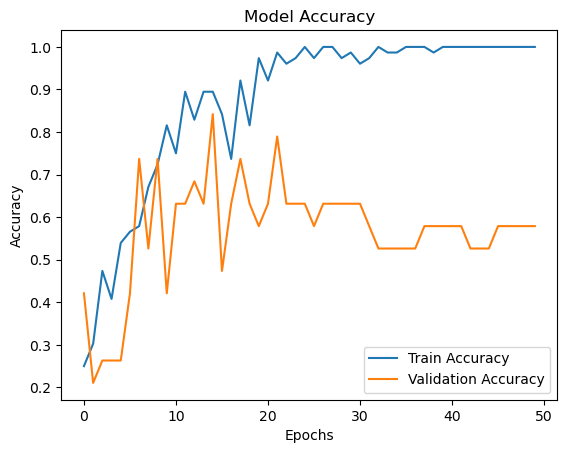

In [91]:
# Visualize training history

# Plot accuracy
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.legend()  # Add legend to the plot
plt.title('Model Accuracy')  # Set the title of the plot
plt.xlabel('Epochs')  # Set the label for the x-axis
plt.ylabel('Accuracy')  # Set the label for the y-axis
plt.show()  # Display the plot



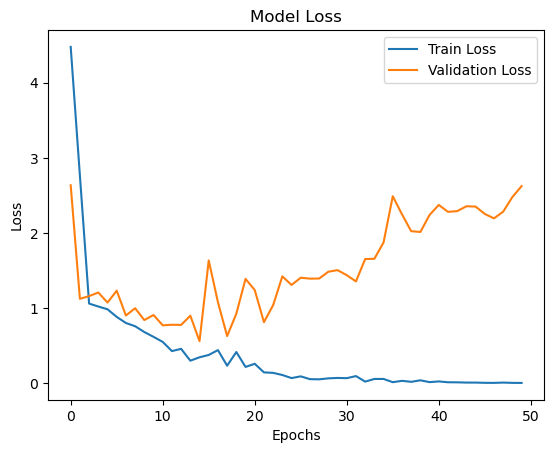

In [92]:
# Plot loss
plt.plot(history_cnn.history['loss'], label='Train Loss')  # Plot training loss
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.legend()  # Add legend to the plot
plt.title('Model Loss')  # Set the title of the plot
plt.xlabel('Epochs')  # Set the label for the x-axis
plt.ylabel('Loss')  # Set the label for the y-axis
plt.show()  # Display the plot


In [93]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, predicted_classes, target_names=titles))

# Compute and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted_classes))

# Compute and print accuracy
accuracy_da = accuracy_score(y_test, predicted_classes)
print(f"Accuracy: {accuracy_da:.4f}")

Classification Report:
                       precision    recall  f1-score   support

Bacterial Leaf Blight       0.88      1.00      0.93         7
           Brown Spot       1.00      0.38      0.55         8
            Leaf Smut       0.69      1.00      0.82         9

             accuracy                           0.79        24
            macro avg       0.86      0.79      0.77        24
         weighted avg       0.85      0.79      0.76        24

Confusion Matrix:
[[7 0 0]
 [1 3 4]
 [0 0 9]]
Accuracy: 0.7917


# **Conclusion**

## Model Comparision

In [96]:
print(f"Accuracy for CNN: {accuracy_cnn:.4f}")
print(f"Accuracy for CNN with Keras Tuner: {accuracy_kt:.4f}")
print(f"Accuracy for CNN with ResNet50 as a base model : {accuracy_resnet:.4f}")
print(f"Accuracy for CNN with Data augmentation: {accuracy_da:.4f}")


Accuracy for CNN: 0.7500
Accuracy for CNN with Keras Tuner: 0.7500
Accuracy for CNN with ResNet50 as a base model : 0.2917
Accuracy for CNN with Data augmentation: 0.7917


### By Comparing the accuracies of all the models, The CNN model using Data Augmentation produces better accuracy of **79 %**

#  Challenges Faced
- The dataset is limited, train and testing is limited as well.
- Limited knowledge on Deep learning algorithms to implement on Image processing
  image shape, array and convertion error was hard to understand, and it took a certain amount of time to understand the code and implement the data.
- when compiling the model, the optimizer, loss and metrics has to be fixed when chnaged there is an error in the output
- loss = sparse_categorical_entropy, when just categorical_entropy is used there is an error in output and distrupts the flow process as our labels are class encoded.
- In CNN with ResNet50  can only identify one class, when the inout are chnaged the class identification varies but still identifies only one class.
- With limited dataset various models and hyperparameters were not able to be implemented as testing and validation data is required more.